In [3]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np

#zoom
result  = reviews_all(
    'us.zoom.videomeetings',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)


In [34]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,17e11c99-08e4-4669-8f27-083aedab8cc6,박한준,https://play-lh.googleusercontent.com/a/ALm5wu...,모바일로 줌을 자주 사용합니다. 그런데 다른 사람이 화면공유를 해서 영상을 본다던지...,3,44,5.11.9.7938,2022-09-21 18:41:52,None,NaT
1,a3930a40-837f-4953-95eb-0544ab5b27fb,Elizalde Tosik,https://play-lh.googleusercontent.com/a-/ACNPE...,"최근, 얼마전까지 안드로이드용 줌은 아이패드용 줌보다 더 좋았습니다. 태블릿의 '화...",3,235,5.11.9.7938,2022-08-28 17:04:11,None,NaT
2,c49f9f46-69d6-42e9-b80f-c6597477336b,Lee Minho,https://play-lh.googleusercontent.com/a/ALm5wu...,"삼성 s21+를 사용하고 있는데, 줌을 20~30분이상 사용하다 보면 열이 많이 납...",4,10,5.12.0.8800,2022-09-29 15:23:51,None,NaT
3,36c37dad-36dd-44e6-a87d-5c340ad06a2d,이우진,https://play-lh.googleusercontent.com/a/ALm5wu...,정말 다좋은데 모바일로 사용할때 상대방이 화면공유를 할때 다른사람을 보기위해 움직이...,4,18,5.12.0.8800,2022-09-30 22:59:38,None,NaT
4,29360afb-4098-4f13-b06f-cd2c2f92254f,Ye Rim OH,https://play-lh.googleusercontent.com/a/ALm5wu...,두 가지만 개선되면 완벽할 것 같습니다. 첫 번째는 줌에 재접속 할 때 기존에 설정...,4,192,5.11.1.6880,2022-07-17 20:51:10,None,NaT


In [5]:
df = df[['content','score']]
drop_index = df[df['score'] == 3].index
df = df.drop(drop_index)
df['label'] = np.where(df['score'] >=4 , 1, 0)
df = df[['content','label']]

In [6]:
df.head()

,content,label
2,"삼성 s21+를 사용하고 있는데, 줌을 20~30분이상 사용하다 보면 열이 많이 납...",1
3,정말 다좋은데 모바일로 사용할때 상대방이 화면공유를 할때 다른사람을 보기위해 움직이...,1
4,두 가지만 개선되면 완벽할 것 같습니다. 첫 번째는 줌에 재접속 할 때 기존에 설정...,1
6,아이들 강의할 때 잘 사용중입니다..ㅎㅎ 다만 정말정말정말정말정말정말정말 아쉬운점은...,1
7,아니 왜 블루투스 이어폰 연결을 못하게 해놓았나요? 모든 기능을 전부 뒤져봐도 계속...,0


In [7]:
# 구글 플레이 com.google.android.apps.tachyon
result_google  = reviews_all(
    'com.google.android.apps.tachyon',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)


In [8]:
df_google = pd.DataFrame(np.array(result_google), columns=['review'])
df_google = df_google.join(pd.DataFrame(df_google.pop('review').tolist()))
df_google = df_google[['content','score']]
drop_index = df_google[df_google['score'] == 3].index

df_google = df_google.drop(drop_index)
df_google['label'] = np.where(df_google['score'] >=4 , 1, 0)
df_google = df_google[['content','label']]

In [9]:
df_google.head()

,content,label
0,현재 UAE에 거주중입니다. 지인과 영상통화를 위해 BOTIM을 이용해 왔는데 최적...,1
1,음질이나 화질은 카톡보다 훨씬 좋았지만 연락처와 동기화한다는 점이 매우 불쾌했습니다...,1
2,1) 화면공유 시작 후 홈화면으로 갈시 화면 공유 바로 끊기는 에러(사실상 이용 전...,0
3,화상통화나 음성통화 문자 모두가 너무 좋습니다. 감사합니다. 그리고 어떤분들은 듀오...,1
4,일단 다른 일반 영통이니 카카오페이스영통 이런것들 보담 낫드라고요. 음질은 수신받는...,1


In [10]:
# 디스코드 com.discord
result_discord  = reviews_all(
    'com.discord',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)


In [11]:
df_discord = pd.DataFrame(np.array(result_discord), columns=['review'])
df_discord = df_discord.join(pd.DataFrame(df_discord.pop('review').tolist()))
df_discord = df_discord[['content','score']]
drop_index = df_discord[df_discord['score'] == 3].index

df_discord = df_discord.drop(drop_index)
df_discord['label'] = np.where(df_discord['score'] >=4 , 1, 0)
df_discord = df_discord[['content','label']]
df_discord.head()

,content,label
2,"최근 들어서는 디스코드가 매우 불편합니다. 업뎃 이후로는 화면공유가 끊기거나, 심하...",0
3,폰 바꾸고 모바일 디스코드 연결하는데 블루투스 이어폰 연결하고 사용하려니까 이어폰에...,0
4,사실 이번 업데이트 이후로 모바일 디스코드가 많이 불편해진거같습니다. 전 버전에서는...,0
5,"업뎃 전에는 정말 좋은 조작감으로 앱을 잘 쓰고 있었지만, 최신 버전은 정말 구리다...",0
6,1. 독서실에서 디스코드를 사용하는 경우에 음성채널 입장하거나 나갈 때 소리가 나서...,1


In [12]:
tmp_df = pd.concat([df, df_google, df_discord], ignore_index=True)

In [13]:
len(tmp_df)

32787

In [14]:
tmp_df.head()

,content,label
0,"삼성 s21+를 사용하고 있는데, 줌을 20~30분이상 사용하다 보면 열이 많이 납...",1
1,정말 다좋은데 모바일로 사용할때 상대방이 화면공유를 할때 다른사람을 보기위해 움직이...,1
2,두 가지만 개선되면 완벽할 것 같습니다. 첫 번째는 줌에 재접속 할 때 기존에 설정...,1
3,아이들 강의할 때 잘 사용중입니다..ㅎㅎ 다만 정말정말정말정말정말정말정말 아쉬운점은...,1
4,아니 왜 블루투스 이어폰 연결을 못하게 해놓았나요? 모든 기능을 전부 뒤져봐도 계속...,0


In [15]:
df_po = tmp_df[tmp_df['label'] == 1]

In [16]:
df_po.head()

,content,label
0,"삼성 s21+를 사용하고 있는데, 줌을 20~30분이상 사용하다 보면 열이 많이 납...",1
1,정말 다좋은데 모바일로 사용할때 상대방이 화면공유를 할때 다른사람을 보기위해 움직이...,1
2,두 가지만 개선되면 완벽할 것 같습니다. 첫 번째는 줌에 재접속 할 때 기존에 설정...,1
3,아이들 강의할 때 잘 사용중입니다..ㅎㅎ 다만 정말정말정말정말정말정말정말 아쉬운점은...,1
5,간편하게 이용이 가능해서 좋아요! 건의사항이 하나 있는데요. 기본 프로필 사진과 닉...,1


In [17]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
%matplotlib inline

In [19]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import json
import re
from collections import Counter

from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import Text

okt = Okt()

In [20]:
text = df_po['content'].values
text = ' '.join(text)
text = re.sub('[^가-힣]',' ',text)
text = re.sub(' +',' ',text)
text = text.strip()

tokens = okt.nouns(text)
tokens = [token for token in tokens if len(token) > 1]
#tokens = [token for token in tokens if token not in stopwords.words('korean')]

count = Counter(tokens)
count = count.most_common(500)



In [21]:
len(count)

500

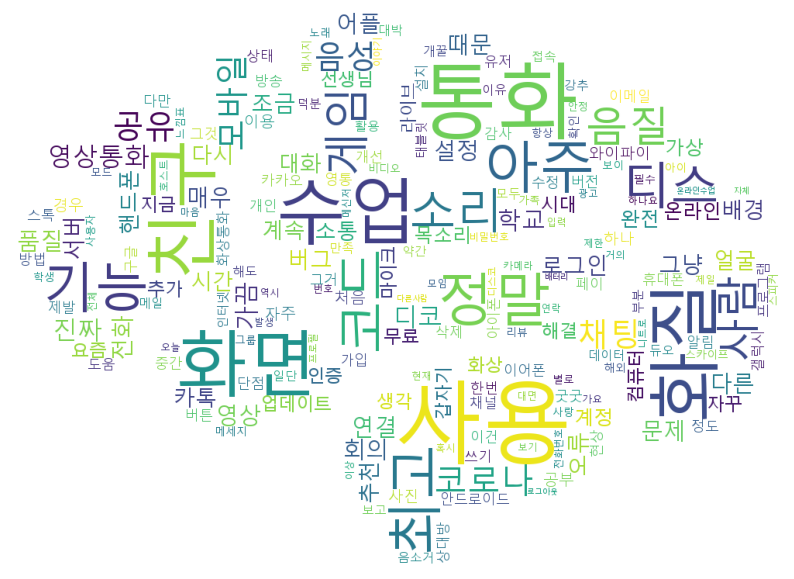

In [24]:
# wordcloud
mask = Image.open('C:\\Users\\HP\\Desktop\\workPlace\\AI\\craw\\data\\img\\18098566.jpg')
mask = np.array(mask)
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=600, mask=mask).generate_from_frequencies(dict(count))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [32]:
from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

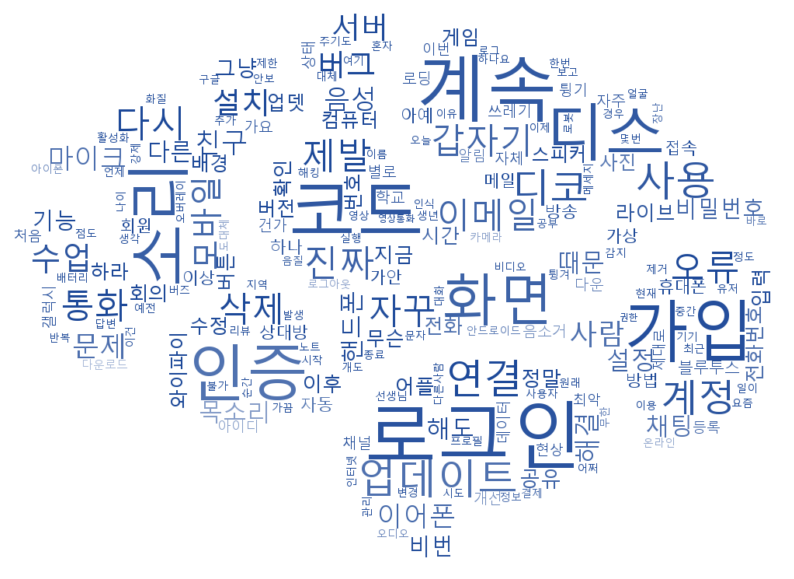

In [33]:
df_ne = tmp_df[tmp_df['label'] == 0]
text = df_ne['content'].values
text = ' '.join(text)
text = re.sub('[^가-힣]',' ',text)
text = re.sub(' +',' ',text)
text = text.strip()

tokens = okt.nouns(text)
tokens = [token for token in tokens if len(token) > 1]
#tokens = [token for token in tokens if token not in stopwords.words('korean')]

count = Counter(tokens)
count = count.most_common(500)

mask = Image.open('C:\\Users\\HP\\Desktop\\workPlace\\AI\\craw\\data\\img\\blue_brain.png')
mask = np.array(mask)
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=600, mask=mask).generate_from_frequencies(dict(count))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()